In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from math import sqrt

data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv") 

In [17]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


1.**(2 pt)** Cuál es la distribución de la edad (**Age**). 
- La distribucion se asemeja a una distribucion normal con  media = 36.92 y varianza = 83.45.

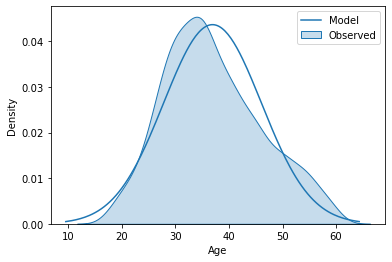

In [92]:

mu = data['Age'].mean()  # media
sigma = sqrt(data['Age'].var())
  # creamos una función numérica a partir de la simbólica para la PDF

x_num = np.linspace(-1, 2)
x = np.linspace(mu-3*sigma, mu+3*sigma, 200)  # evaluamos 200 valores en el intervalo para suavizar
plt.plot(x, norm.pdf(x, mu, sigma),label="Model")  # PDF

sns.kdeplot(data['Age'], shade="true", label="Observed")
plt.legend()
plt.xlabel("Age")
plt.show()

2. (2 pt) Cuál es la probabilidad de que un trabajador de Creative HR tenga 30 años o menos.

- La probabilidad de que un trabajador de Creative HR tenga 30 años o menos esta dado por $$P(X \leq 30)$$  usando una funcion en python tenemos que la probabilidad es 22%. Mientras que la probabildad segun nuestra muestra es de 26%

In [59]:
print( 'Segun el modelo observado ', norm.cdf(30, mu, sigma))
# Segun los datos obtenidos tenemos que 
eda= [i for i in data['Age'] if i <=30 ]
pro= len(eda)/len(data['Age'])
print( 'Segun los datos observados ', pro)

Segun el modelo observado  0.22425182209561367
Segun lso datos observados  0.26258503401360545


3. (2 pt) Analice la edad de los trabajadores (Age) con respecto a si el trabajador se encuentra o no en la empresa (Attrition).
- Segun los resutados obtenidos vemos valores semejantes respecto a la media ademas las distribuciones tambien son semejantes, cabe mencionar que el 80 porciento de los empleados tiene el parametro 'Attrition'=='No' y su media difiere con aproximadamente 4 años respecto al 20% de los empledos con 'Attrition'=='Yes'

In [160]:
data_ay.shape
data_an.shape
1233/len(data)
len(data_ay)

237

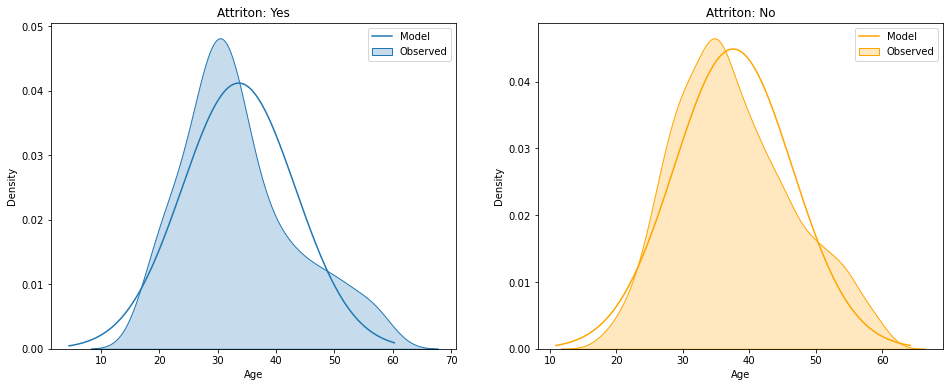

In [93]:
data_ay=data[ data['Attrition']=='Yes' ]
data_an=data[ data['Attrition']=='No' ]

mu_ay = data_ay['Age'].mean()  # media
sigma_ay = sqrt( data_ay['Age'].var())

mu_an = data_an['Age'].mean()
sigma_an = sqrt( data_an['Age'].var())
  # creamos una función numérica a partir de la simbólica para la PDF

x_num = np.linspace(-1, 2)
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
x = np.linspace(mu_ay-3*sigma_ay, mu_ay+3*sigma_an, 200)  # evaluamos 200 valores en el intervalo para suavizar
plt.plot(x, norm.pdf(x, mu_ay, sigma_ay),label="Model")  # PDF
plt.title("Attriton: Yes")
sns.kdeplot(data_ay['Age'], shade="true", label="Observed")
plt.legend()
plt.xlabel("Age")

plt.subplot(1,2,2)
x = np.linspace(mu_an-3*sigma_an, mu_an+3*sigma_an, 200)  # evaluamos 200 valores en el intervalo para suavizar
plt.plot(x, norm.pdf(x, mu_an, sigma_an),label="Model", color = 'orange')  # PDF
plt.title("Attriton: No")
sns.kdeplot(data_an['Age'], shade="true", label="Observed", color = 'orange')
plt.legend()
plt.xlabel("Age")
plt.show()



In [100]:
print('La media de la edad de las personas que se encuentran en la empresa es: ', data_ay['Age'].mean())
print('La media de la edad de las personas que no se encuentran en la empresa es: ', data_an['Age'].mean())

La media de la edad de las personas que se encuentran en la empresa es:  33.607594936708864
La media de la edad de las personas que no se encuentran en la empresa es:  37.561232765612324


4. (2 pt) Cuál es la probabilidad de que un trabajador que ya no se encuentra en Creative
HR tenga 30 años o menos. Responda usando los datos observados y el modelo asumido.
- La probabilidad de que un trabajador de Creative HR tenga 30 años o menos esta dado por $$P(X \leq 30)$$  usando una funcion en python tenemos que la probabilidad es 19%. Mientras que la probabildad segun nuestra muestra es de 23%

In [102]:
print( 'Segun el modelo observado ', norm.cdf(30, mu_an, sigma_an))
# Segun los datos obtenidos tenemos que 
eda= [i for i in data_an['Age'] if i <=30 ]
pro= len(eda)/len(data_an['Age'])
print( 'Segun los datos observados ', pro)

Segun el modelo observado  0.19747098434720828
Segun los datos observados  0.23195458231954583


5. (2 pt) Discuta qué tan adecuada considera la distribución usada para modelar nuestros
datos observados.
- Considero que la distribución utilizada para modelar la variable edad es la correcta. Se pudo apreciar en la pregunta 2 y 4 que la probabilidad usando las observaciones fueron muy parecidas a la probabilidad usando CDF. Gracias a los gráficos también confirman que el uso de la distribución normal para modelar los datos observados de la edad relacionados con Attriton fueron los correctos. Existen algunas consideraciones como el sesgo a la derecha en las graficas de la pregunta 3. Valores que quiza podian ser modelados con una distribucion gamma. 
Sabemos que:
$$ X\sim Gamma(\alpha , \beta) / / o / / X\sim Gamma(k , 1/ \theta) $$ 
donde:
$$ mean= k*\theta $$ 
$$ variance= k*\theta^2 $$ 

- En la pregunta 4 existe una mejora respecto a la probabilidad de que un trabajador que ya no este en la empresa tenga menos de 30 años.
Probabilida normal = 0.1974
Probabilida gamma = 0.2018
Probabilida muestra observada= 0.2319. Anque la aproximacion no es tan diferente si podriamos ver resutados direntes al lado derecho de la distribucion.

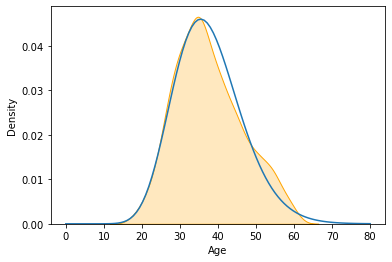

Segun el modelo observado  0.2018033186897132
Segun los datos observados  0.23195458231954583


In [149]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

#define x-axis values
x = np.linspace (0, 80, 100) 

#calculate pdf of Gamma distribution for each x-value
scla= data_an['Age'].var()/data_an['Age'].mean()
y = stats.gamma.pdf(x, a= data_an['Age'].mean()/scla, scale=scla)
sns.kdeplot(data_an['Age'], shade="true", label="Observed", color = 'orange')
plt.plot(x, y)

#display plot
plt.show()

y = stats.gamma.cdf(30, a= data_an['Age'].mean()/scla, scale=scla)
print('Segun el modelo observado ', y)
eda= [i for i in data_an['Age'] if i <=30 ]
pro= len(eda)/len(data_an['Age'])
print( 'Segun los datos observados ', pro)


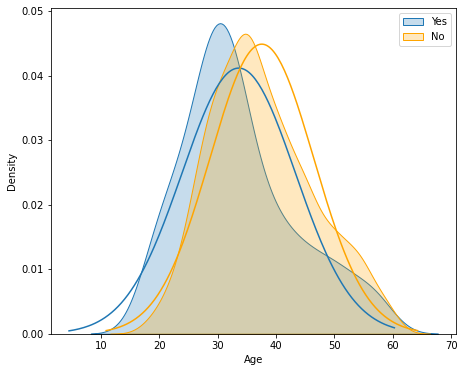

In [99]:
data_ay=data[ data['Attrition']=='Yes' ]
data_an=data[ data['Attrition']=='No' ]

mu_ay = data_ay['Age'].mean()  # media
sigma_ay = sqrt( data_ay['Age'].var())

mu_an = data_an['Age'].mean()
sigma_an = sqrt( data_an['Age'].var())
  # creamos una función numérica a partir de la simbólica para la PDF

x_num = np.linspace(-1, 2)
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
x = np.linspace(mu_ay-3*sigma_ay, mu_ay+3*sigma_an, 200)  # evaluamos 200 valores en el intervalo para suavizar
plt.plot(x, norm.pdf(x, mu_ay, sigma_ay))  # PDF
sns.kdeplot(data_ay['Age'], shade="true", label="Yes")
x = np.linspace(mu_an-3*sigma_an, mu_an+3*sigma_an, 200)  # evaluamos 200 valores en el intervalo para suavizar
plt.plot(x, norm.pdf(x, mu_an, sigma_an), color = 'orange')  # PDF
sns.kdeplot(data_an['Age'], shade="true", label="No", color = 'orange')
plt.legend()
plt.xlabel("Age")
plt.show()